### **Young People Survey**

*Согласно [описанию](https://www.kaggle.com/miroslavsabo/young-people-survey) на kaggle.com:*
В 2013 году студентам FSEV UK и их друзьям (в возрасте от 15 до 30 лет) было предложено принять участие в опросе. Вопросы касались их предпочтений в музыке и фильмах, их хобби, страхов, здоровье, привычек. Также молодые люди оставляли информацию о своём возрасте, поле, физических данных,  составе семьи, месте проживания, уровне образования.
**Вопрос**: Проанализировать данные о наличии вредных привычек среди респондентов: есть ли зависимость между наличием вредных привычек и музыкальным вкусом?

## Оценка данных


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('/content/responses.csv')

In [ ]:
data.head()

In [ ]:
data.shape

(1010, 150)

В датасете представлены данные 1010 респондентов, ответивших на 150 вопросов.


В датасете есть: 
  1.   численные данные:
      *   музыкальные предпочтения
      *   предпочтения в кино
      *   хобби и интересы
      *   страхи
      *   личностные качества, взгляды на жизнь и мнения
      *   финансовые привычки
      *   возраст, рост и вес, количество детей в семье
  2.   категориальные данные: 
      *   пьёт/не пьёт
      *   курит/не курит
      *   пол
      *   левша/правша
      *   уровень образования
      *   единственный ребёнок в семье?
      *   вырос в: городе/сельской местности
      *   проживает в: частном/многоквартирном доме




В соответствии с задачей, нам понадобятся данные о музыкальных предпочтениях и наличии вредных привычек.

In [ ]:
alc = data['Alcohol']
print(alc.head(), alc.unique(), alc.count()) # 3 варианта ответов на вопрос об употреблении алкоголя, а так же 5 nan 

0       drink a lot
1       drink a lot
2       drink a lot
3       drink a lot
4    social drinker
Name: Alcohol, dtype: object ['drink a lot' 'social drinker' 'never' nan] 1005


In [ ]:
tab = data['Smoking']
print(tab.head(), tab.unique(), tab.count()) # 4 варианта ответов на вопрос о курении + 8 nan

0     never smoked
1     never smoked
2    tried smoking
3    former smoker
4    tried smoking
Name: Smoking, dtype: object ['never smoked' 'tried smoking' 'former smoker' 'current smoker' nan] 1002


In [ ]:
music = data.loc[:, 'Dance':'Opera']
print(music.head(), music.info(), music.count()) # шкала оценок от 1 до 5, также присутствуют нулевые значения

## Обработка данных
Соберем необходимые данные в один датафрейм для удобства, удалим ответы с nan хотя бы по одному вопросу.

In [ ]:
cols=['Alcohol', 'Smoking', 'Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera']
habits_with_null = pd.DataFrame(data, columns=cols)
habits = habits_with_null.dropna()
print(habits.head(), habits.info())

Заменим ответы в колонках 'Alcohol' и 'Smoking' на численные. Для музыкальных жанров упростим оценку: 

оценка $<=$ 3 $\rightarrow$ не нравится (0)

оценка $>$ 3 $\rightarrow$ нравится (1):

In [ ]:
habits['Smoking'] = habits['Smoking'].replace(['never smoked', 'tried smoking', 'former smoker', 'current smoker'], [0, 2, -1, 1])
habits['Alcohol'] = habits['Alcohol'].replace(['drink a lot', 'social drinker', 'never'], [1, 2, 0])
habits.loc[:, 'Dance':'Opera'] = habits.loc[:, 'Dance':'Opera'].replace([1.0, 2.0, 3.0, 4.0, 5.0], [0, 0, 0, 1, 1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

## Проверяем гипотезу

Чтобы получить представление о соотношении курящих и пьющих респондентов, построим круговые диаграммы:

In [ ]:
plt.pie([sum(habits['Smoking'] == 0), sum(habits['Smoking'] == 2), sum(habits['Smoking'] == -1), sum(habits['Smoking'] == 1)], radius=1.2)
plt.legend(('never smoked', 'tried smoking', 'former smoker', 'current smoker'))
plt.title('Общее')
for i in cols[2:]:
    plt.figure(i)
    plt.pie([sum((habits[i] == 1.0) & (habits['Smoking'] == 0)), sum((habits[i] == 1.0) & (habits['Smoking'] == 2)), sum((habits[i] == 1.0) & (habits['Smoking'] == -1)), sum((habits[i] == 1.0) & (habits['Smoking'] == 1))])
    plt.title(i)
plt.show()

Построим столбцовую диаграмму, показывающую соотношение респондентов, употребляющих табак и алкоголь, среди фанатов различных музыкальных жанров:


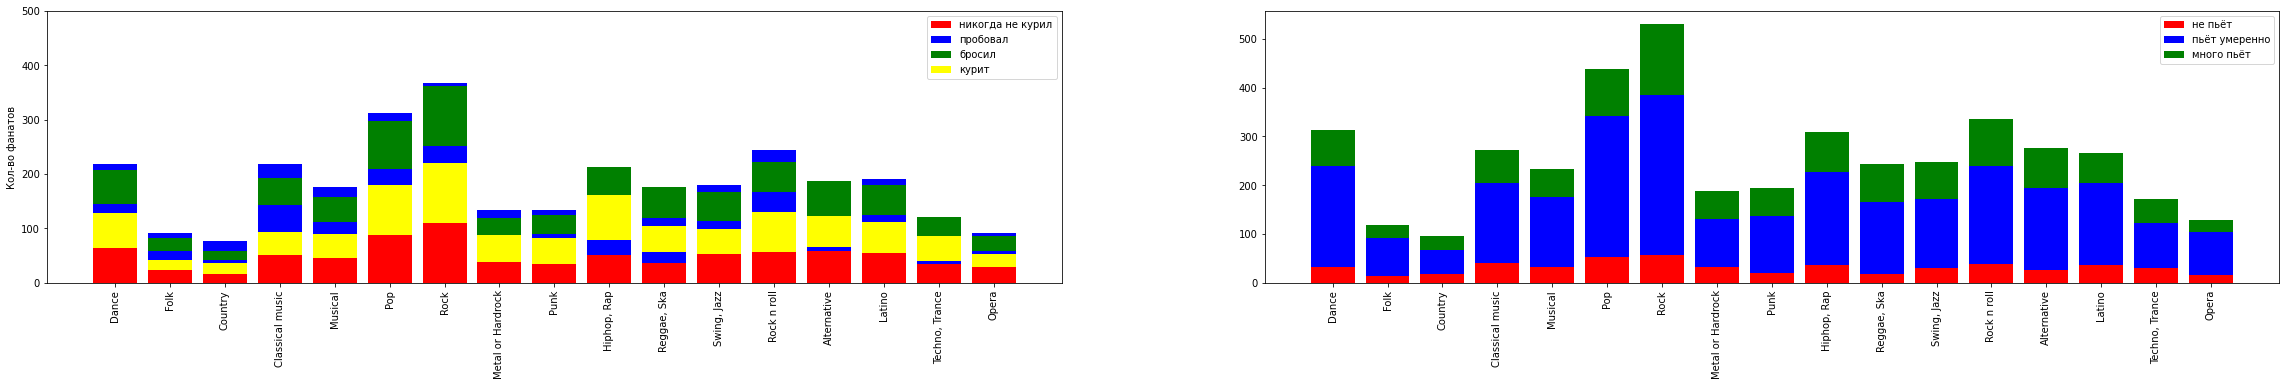

In [ ]:
fig, ax = plt.subplots(1, 2)
for i in cols[2:]:
    ax[0].bar(i, sum((habits[i] == 1.0) & (habits['Smoking'] == 0)), color='r')
    ax[0].bar(i, sum((habits[i] == 1.0) & (habits['Smoking'] == 2)), bottom=sum((habits[i] == 1.0) & (habits['Smoking'] == 0)), color='b')
    ax[0].bar(i, sum((habits[i] == 1.0) & (habits['Smoking'] == -1)), bottom=sum((habits[i] == 1.0) & (habits['Smoking'] == 2)), color='g')
    ax[0].bar(i, sum((habits[i] == 1.0) & (habits['Smoking'] == 1)), bottom=sum((habits[i] == 1.0) & (habits['Smoking'] == -1)), color='yellow')
    ax[1].bar(i, sum((habits[i] == 1.0) & (habits['Alcohol'] == 0)), color='r')
    ax[1].bar(i, sum((habits[i] == 1.0) & (habits['Alcohol'] == 2)), bottom=sum((habits[i] == 1.0) & (habits['Alcohol'] == 0)), color='b')
    ax[1].bar(i, sum((habits[i] == 1.0) & (habits['Alcohol'] == 1)), bottom=sum((habits[i] == 1.0) & (habits['Alcohol'] == 2)), color='g')
ax[0].legend(('никогда не курил', 'пробовал', 'бросил', 'курит'))
ax[0].set_ylim(0, 500)
ax[0].set_ylabel('Кол-во фанатов')
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=90 )
ax[1].legend(('не пьёт', 'пьёт умеренно', 'много пьёт'))
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=90 )

fig.set_figwidth(40)
fig.set_figheight(5)

plt.show()

На первом графике представлено соотношение курильщиков, некурящих, бросивших и однажды пробовавших курить фанатов различных музыкальных жанров. На втором графике - соотношение пьющих, непьющих и периодически употребляющих алкоголь респондентов. Можно, к примеру, заметить, что % курильщиков среди любителей хип-хопа выше, чем среди фанатов других жанров. Тем временем,кажется, среди любителей разных жанров одинаковое соотношение пьющих, не пьющих и умеренно употребляющих. 

## О данных и задаче

Не ожидала увидеть какую-то закономерность, но, возможно, любители некоторых жанров с большей вероятностью могут оказаться курильщиками. Ещщё интересно было бы посмотреть, больше ли курильщиков/пьющих среди городских/сельских жителей, среди женщин и мужчин.